In [2]:
from typing import List

import xarray as xr
import mne
import cedalion

import cedalion.dataclasses as cdc

In [3]:
snirf_file = '../data/fNIRS/DCARE_02_sub1.snirf'

# For comparison
mne_raw = mne.io.read_raw_snirf(snirf_file)



Loading /home/patrice/work/ppsp/HyPyP-synchro/tutorial/../data/fNIRS/DCARE_02_sub1.snirf


In [4]:
recordings: List[cdc.Recording] = cedalion.io.read_snirf(snirf_file)
rec = recordings[0]
rec


<Recording |  timeseries: ['amp'],  masks: [],  stim: ['1', '2', '3', '4', '5'],  aux_ts: ['aux1'],  aux_obj: []>

In [5]:

print("timeseries: ", rec.timeseries.keys())

rec['amp'] = rec['amp'].pint.dequantify().pint.quantify("V")
rec['amp']['time'] = rec['amp']['time'].pint.dequantify().pint.quantify("second")

display(rec['amp'])


timeseries:  odict_keys(['amp'])


Magnitude,[[[0.0874001 0.0873486 0.0862635 ... 0.3154641 0.3251515 0.321883] [0.1819033 0.1821339 0.178543 ... 0.4858249 0.4995157 0.4929365]] [[0.5816825 0.5866949 0.5802967 ... 0.6266061 0.6399603 0.6293864] [0.7743831 0.7823475 0.7692652 ... 0.9088822 0.9303168 0.9112671]] [[0.5406844 0.5390904 0.5311352 ... 0.2117668 0.0646121 0.1521831] [1.5606117 1.5529815 1.5253948 ... 0.2014856 0.0615168 0.1452051]] ... [[0.2248863 0.2225803 0.2214117 ... 0.292814 0.2877484 0.2882748] [0.2518203 0.2484802 0.2459234 ... 0.3163313 0.3079562 0.3074719]] [[0.164987 0.1637849 0.1627394 ... 0.2201276 0.2169606 0.215694] [0.2352225 0.2328363 0.2308857 ... 0.2833901 0.2785207 0.2765319]] [[0.4467081 0.4434275 0.4432463 ... 0.4815715 0.470441 0.4688543] [0.4936094 0.4882584 0.4865505 ... 0.495366 0.4798062 0.4770489]]]
Units,volt


In [6]:
od = cedalion.nirs.int2od(rec['amp'])
od



Magnitude,[[[0.8240607334419864 0.8246501512916298 0.837150594865231 ... -0.4594877276007134 -0.489734067292359 -0.4796309652104865] [0.6171632513742492 0.6158963477125158 0.6358090100025698 ... -0.36520979234537304 -0.39300055045614424 -0.3797418839314653]] [[0.09132141525974594 0.08274125828194451 0.09370665702143724 ... 0.01692806793915596 -0.0041599616916383085 0.012500804971729803] [0.14349144661341665 0.13325914374831802 0.15012238547759657 ... -0.016657333829746157 -0.039967014311658056 -0.019277889588354396]] [[0.09784184525973026 0.10079431490047054 0.1156609869733848 ... 1.035191920514687 2.222275889992235 1.365593188588021] [-0.2037979860165073 -0.1988967578956299 -0.18097338802786692 ... 1.8433172379413323 3.0297248445146954 2.1708879270137382]] ... [[0.16824323168393546 0.17855023745673837 0.18381430842438692 ... -0.09569942232064123 -0.07824831437315384 -0.08007601904385733] [0.14104450082452674 0.1543970744307029 0.16474013339544494 ... -0.08702984337789309 -0.0601973263443699 -0.058623462232641727]] [[0.3000672795973008 0.3073799809377348 0.3137838141159308 ... 0.011726584297794778 0.026218192280232956 0.032073225918621176] [0.23155487922055207 0.24175112239803875 0.25016397106439014 ... 0.045262360245432946 0.06259437057920021 0.06976056892194608]] [[0.09365540509659066 0.10102645025765085 0.10143516877966523 ... 0.01850605176273843 0.041890213615251776 0.04526870706506403] [0.04410474880586563 0.05500449106597204 0.05850856606476003 ... 0.04055238168478947 0.07246699260288343 0.0782302636186092]]]
Units,dimensionless


In [7]:
display(rec['amp'])



Magnitude,[[[0.0874001 0.0873486 0.0862635 ... 0.3154641 0.3251515 0.321883] [0.1819033 0.1821339 0.178543 ... 0.4858249 0.4995157 0.4929365]] [[0.5816825 0.5866949 0.5802967 ... 0.6266061 0.6399603 0.6293864] [0.7743831 0.7823475 0.7692652 ... 0.9088822 0.9303168 0.9112671]] [[0.5406844 0.5390904 0.5311352 ... 0.2117668 0.0646121 0.1521831] [1.5606117 1.5529815 1.5253948 ... 0.2014856 0.0615168 0.1452051]] ... [[0.2248863 0.2225803 0.2214117 ... 0.292814 0.2877484 0.2882748] [0.2518203 0.2484802 0.2459234 ... 0.3163313 0.3079562 0.3074719]] [[0.164987 0.1637849 0.1627394 ... 0.2201276 0.2169606 0.215694] [0.2352225 0.2328363 0.2308857 ... 0.2833901 0.2785207 0.2765319]] [[0.4467081 0.4434275 0.4432463 ... 0.4815715 0.470441 0.4688543] [0.4936094 0.4882584 0.4865505 ... 0.495366 0.4798062 0.4770489]]]
Units,volt


In [8]:

display(rec['amp']['time'])

<xarray.DataArray 'time' (time: 13596)> Size: 109kB
array([0.000000e+00, 1.280000e-01, 2.560000e-01, ..., 1.739904e+03,
       1.740032e+03, 1.740160e+03])
Coordinates:
    samples  (time) int64 109kB 0 1 2 3 4 5 ... 13591 13592 13593 13594 13595
  * time     (time) float64 109kB 0.0 0.128 0.256 ... 1.74e+03 1.74e+03 1.74e+03
Attributes:
    units:    second

In [9]:
dpf = xr.DataArray(
    [6., 6.],
    dims="wavelength",
    coords={"wavelength" : [760., 850.]})

rec['conc'] = cedalion.nirs.beer_lambert(rec['amp'], rec.geo3d, dpf)
rec['conc']

Magnitude,[[[85.04550782707737 84.52349096946857 89.41324430508308 ... -54.61455724826893 -59.48917337160916 -56.50446497670291] [27.799654325110755 26.067139199579955 29.306000927860513 ... -6.553221225106054 -10.313668121126808 -6.727521062447485] [-56.941193194766065 -56.1167669767973 -53.51995197516233 ... 317.786486246785 468.82537219046 359.2172020887369] ... [19.89833437411269 22.539345314762823 24.951553035980982 ... -13.37111819458087 -7.62451488011891 -6.903287517995883] [29.99301881309587 32.12327839927971 33.83015158016576 ... 12.301436349119323 15.639744767287992 17.038785201942908] [0.6318415774838736 2.7282445309047976 3.643398888547775 ... 8.896549737216251 14.813247306058065 15.985560190883994]] [[112.40958914376608 112.71055544230033 113.0535244353295 ... -59.956002848810144 -63.418466401317296 -62.775226326082105] [2.1901908325268704 1.6516157969927285 1.9521330938631853 ... 4.83599095046619 3.323966788092982 4.2857551287440945] [33.12568541024696 33.163068165900114 33.939545670521575 ... 2.2360648556928617 85.5471811430487 25.6541291458847] ... [18.582620504038587 19.182921550400888 19.08710474986675 ... -9.7933215912101 -9.259436484466095 -9.816041614539163] [36.077002843686714 36.42666662042731 36.79289959278964 ... -2.801736143453772 -1.7745671220389823 -1.378582796605038] [13.031358374204572 13.282462470502612 12.994057603700156 ... -0.7444771265986949 0.3299006163051154 0.36498133450753134]]]
Units,micromolar


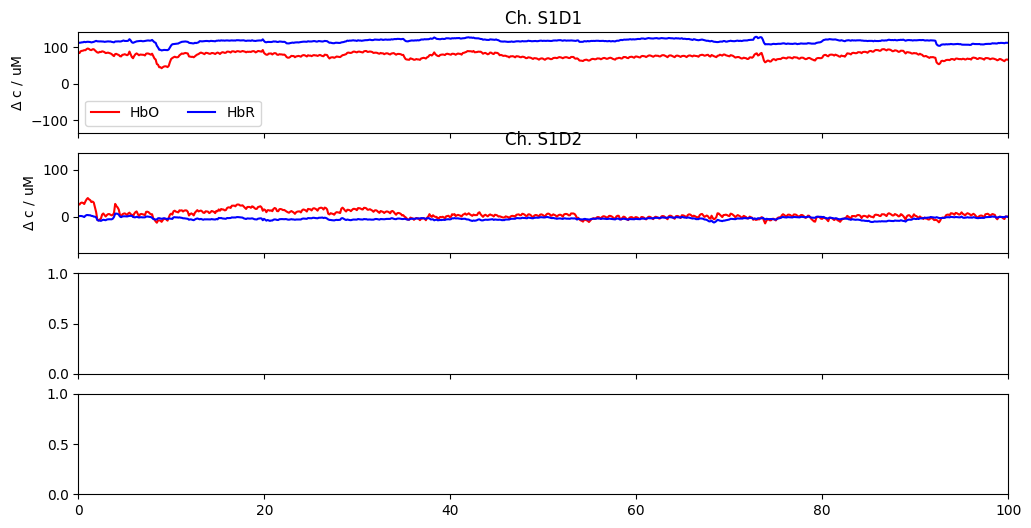

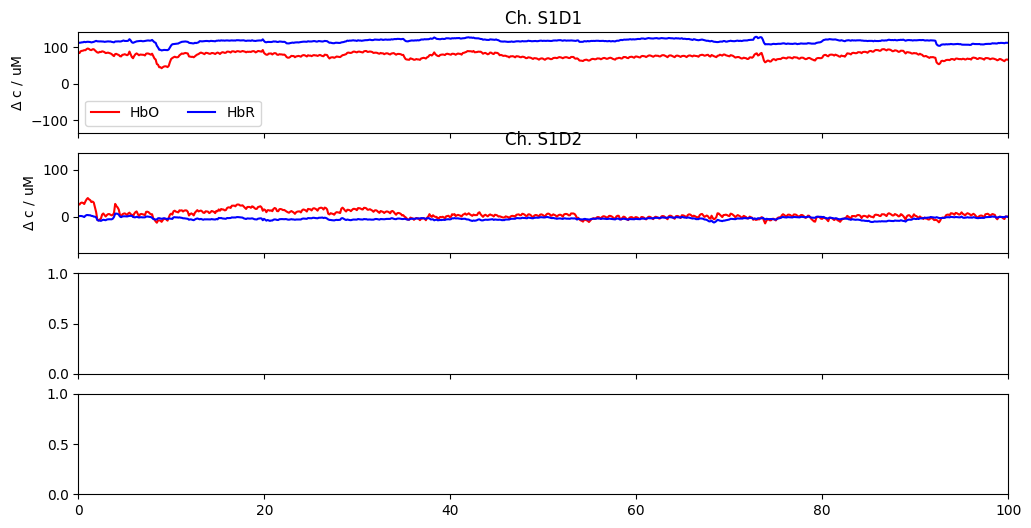

In [ ]:
from hypyp.fnirs.preprocessors.cedalion_preprocessor_fnirs import CedalionPreprocessorFNIRS
preprocessor = CedalionPreprocessorFNIRS()
steps = preprocessor.run(preprocessor.read_file(snirf_file))

steps[-1].plot()
